INTRODUCTION

This dataset contains social media engagement data from various platforms, including Facebook, Instagram, and Twitter. It includes key attributes such as post type, posting time, caption, hashtags, and engagement metrics like likes, comments, and shares. Additionally, the dataset provides insights into post sentiment and timing, which can be useful for analyzing social media trends and optimizing content strategies.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data3=pd.read_csv(r"C:\data science\data_set\social_media_engagement.csv")
print(data3)


     post_id   platform post_type         post_time  \
0          1   Facebook     image  2023-08-17 14:45   
1          2   Facebook  carousel  2023-05-14 00:45   
2          3  Instagram      poll  2023-02-21 16:15   
3          4    Twitter     image  2023-11-16 00:45   
4          5    Twitter     video  2023-05-23 00:30   
..       ...        ...       ...               ...   
995      996  Instagram     video  2023-04-25 07:15   
996      997    Twitter     image  2023-09-09 07:30   
997      998  Instagram     video  2023-08-18 23:15   
998      999   Facebook      text  2023-10-05 00:15   
999     1000    Twitter      poll  2023-09-11 21:15   

                         caption                          hashtags  likes  \
0               Best day ever! 🎉                           #Social   2121   
1         Here's a quick update.      #Family, #Community, #Events   3660   
2             Not my best day. 😞    #Beauty, #Fashion, #InstaDaily   4955   
3    Disappointed but moving on

In [2]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          1000 non-null   int64 
 1   platform         1000 non-null   object
 2   post_type        1000 non-null   object
 3   post_time        1000 non-null   object
 4   caption          1000 non-null   object
 5   hashtags         1000 non-null   object
 6   likes            1000 non-null   int64 
 7   comments         1000 non-null   int64 
 8   shares           1000 non-null   int64 
 9   caption_length   1000 non-null   int64 
 10  num_hashtags     1000 non-null   int64 
 11  post_hour        1000 non-null   int64 
 12  post_day         1000 non-null   object
 13  sentiment_score  1000 non-null   object
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [3]:
data3["post_time"]=pd.to_datetime(data3["post_time"])
data3["post_hour"]=pd.to_datetime(data3["post_hour"])
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          1000 non-null   int64         
 1   platform         1000 non-null   object        
 2   post_type        1000 non-null   object        
 3   post_time        1000 non-null   datetime64[ns]
 4   caption          1000 non-null   object        
 5   hashtags         1000 non-null   object        
 6   likes            1000 non-null   int64         
 7   comments         1000 non-null   int64         
 8   shares           1000 non-null   int64         
 9   caption_length   1000 non-null   int64         
 10  num_hashtags     1000 non-null   int64         
 11  post_hour        1000 non-null   datetime64[ns]
 12  post_day         1000 non-null   object        
 13  sentiment_score  1000 non-null   object        
dtypes: datetime64[ns](2), int64(6), object(6)

In [4]:
data3.isna().sum()
len(data3)

1000

In [5]:
data3.head(5)

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
0,1,Facebook,image,2023-08-17 14:45:00,Best day ever! 🎉,#Social,2121,474,628,16,1,1970-01-01 00:00:00.000000014,Thursday,positive
1,2,Facebook,carousel,2023-05-14 00:45:00,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,1970-01-01 00:00:00.000000000,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15:00,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,1970-01-01 00:00:00.000000016,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45:00,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,1970-01-01 00:00:00.000000000,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30:00,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,1970-01-01 00:00:00.000000000,Tuesday,positive


In [6]:
data3.duplicated().sum()

0

In [7]:
data3["post_id"].value_counts()

1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: post_id, Length: 1000, dtype: int64

In [8]:
#filtering the dataset
data3[data3["num_hashtags"]==3].head(5)

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
1,2,Facebook,carousel,2023-05-14 00:45:00,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,1970-01-01 00:00:00.000000000,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15:00,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,1970-01-01 00:00:00.000000016,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45:00,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,1970-01-01 00:00:00.000000000,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30:00,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,1970-01-01 00:00:00.000000000,Tuesday,positive
8,9,Facebook,video,2023-05-02 06:15:00,Just another day.,"#Friends, #Family, #Events",317,249,221,17,3,1970-01-01 00:00:00.000000006,Tuesday,neutral


<Axes: >

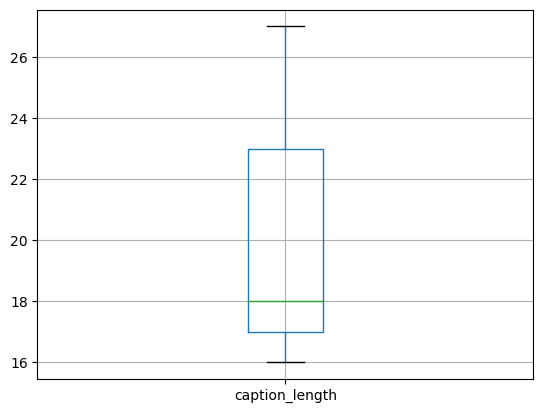

In [9]:
data3[["caption_length"]].boxplot()

In [10]:
data3.corr()

C:\Users\jonsn\AppData\Local\Temp\ipykernel_34256\1309869703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data3.corr()


,post_id,likes,comments,shares,caption_length,num_hashtags
post_id,1.000000,-0.008479,-0.022774,0.010606,-0.002338,0.004133
likes,-0.008479,1.000000,0.228529,0.143166,0.064649,0.045875
comments,-0.022774,0.228529,1.000000,0.219879,0.011231,0.042734
shares,0.010606,0.143166,0.219879,1.000000,0.017512,0.015121
caption_length,-0.002338,0.064649,0.011231,0.017512,1.000000,0.009600
num_hashtags,0.004133,0.045875,0.042734,0.015121,0.009600,1.000000


In [11]:
data3.describe()

,post_id,likes,comments,shares,caption_length,num_hashtags
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2270.051000,218.247000,420.810000,19.699000,1.988000
std,288.819436,1500.915826,141.891822,285.583266,3.375173,0.815181
min,1.000000,0.000000,10.000000,0.000000,16.000000,1.000000
25%,250.750000,1016.750000,97.000000,185.750000,17.000000,1.000000
50%,500.500000,2047.000000,186.000000,375.500000,18.000000,2.000000
75%,750.250000,3453.250000,327.250000,654.500000,23.000000,3.000000
max,1000.000000,5000.000000,500.000000,1000.000000,27.000000,3.000000


1. which social media platform generates the highest engagement

In [12]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3['shares']
highest_engaged_platform=data3.groupby("platform")["total_engagement"].mean().sort_values(ascending=False)
print(highest_engaged_platform)

platform
Facebook     3425.981651
Instagram    3389.515942
Twitter      1888.503049
Name: total_engagement, dtype: float64


2.which post type perorms best in terms o engagement ?

In [13]:
engagement_by_post=data3.groupby("post_type")["total_engagement"].mean().sort_values(ascending=False)
print(engagement_by_post)

post_type
video       3595.464481
image       3066.797927
poll        3058.188679
carousel    2810.280193
text        2093.570732
Name: total_engagement, dtype: float64


3.how does the number of hashtages impact the engagement metrics?


In [14]:
engagement_by_hashtags=data3.groupby("num_hashtags")[["likes","comments","shares"]].mean()
print(engagement_by_hashtags)

                    likes    comments      shares
num_hashtags                                     
1             2165.736686  208.449704  412.955621
2             2313.038690  223.261905  426.145833
3             2333.898773  223.236196  423.453988


4. is there a correlation between caption length and the number of likes and shares ?

In [15]:
corr_caption_likes=data3["caption_length"].corr(data3["likes"])
corr_caption_shares=data3["caption_length"].corr(data3["shares"])
print("correlation between caption length and likes:",corr_caption_likes)
print("correlation between caption length and shares:",corr_caption_shares)


correlation between caption length and likes: 0.0646489423335723
correlation between caption length and shares: 0.017511998141846695


5. do positive captions generate more likes compared to neutral or negative captions

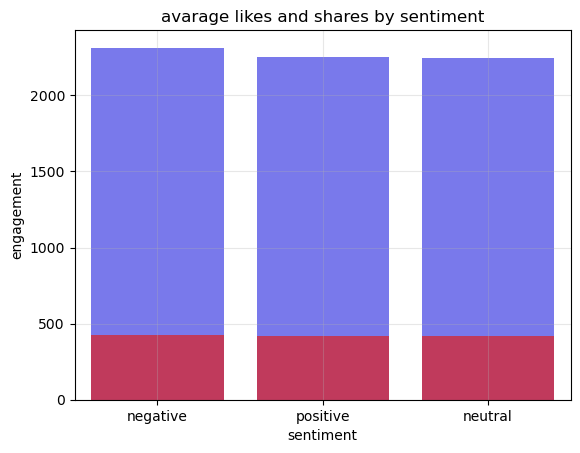

In [16]:
engagement_by_sentiment=data3.groupby("sentiment_score")[["likes","shares"]].mean().sort_values(by="likes",ascending=False)
plt.figure(figsize=(10,6))
plt.close("all")
sns.barplot(data=engagement_by_sentiment.reset_index(),x="sentiment_score",y="likes",label="likes",alpha=0.6,color="blue")
sns.barplot(data=engagement_by_sentiment.reset_index(),x="sentiment_score",y="shares",label="shares",alpha=0.7,color="red")
plt.title("avarage likes and shares by sentiment")
plt.xlabel("sentiment")
plt.ylabel("engagement")
plt.grid(alpha=0.3)
plt.show()

6.how does the engagement vary across diffrent platforms by day of the week or time of the day

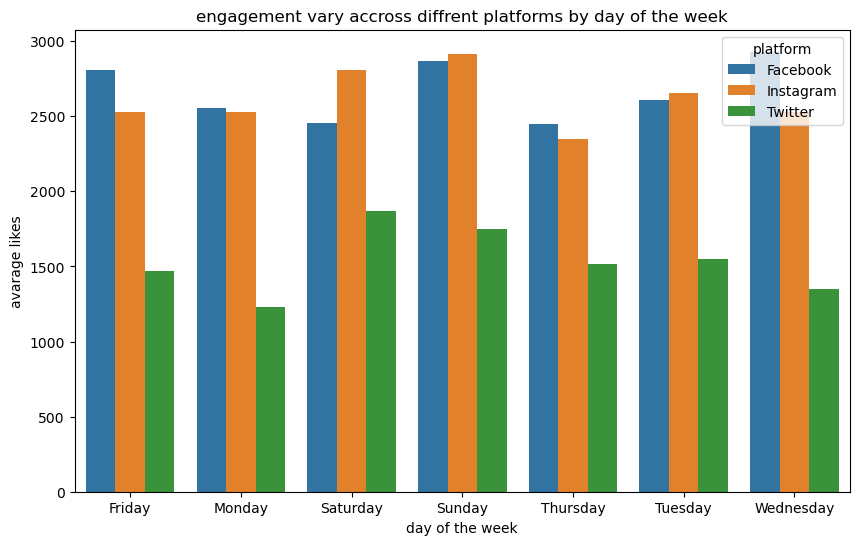

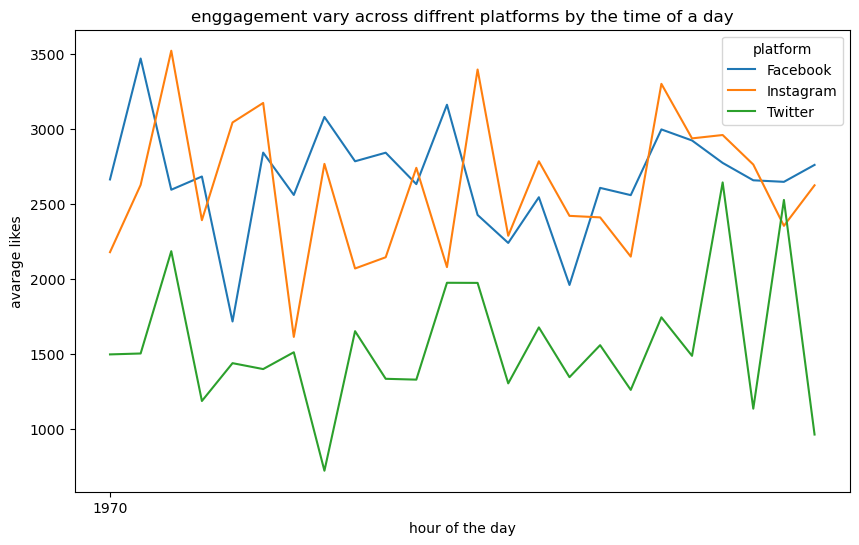

In [17]:
platform_day_engagement=data3.groupby(["platform","post_day"])[["likes","comments","shares"]].mean().reset_index()
platform_hour_engagement=data3.groupby(["platform","post_hour"])[["likes","comments","shares"]].mean().reset_index()
plt.close("all")
plt.figure(figsize=(10,6))
sns.barplot(data=platform_day_engagement,x='post_day',y='likes',hue="platform")
plt.title("engagement vary accross diffrent platforms by day of the week")
plt.xlabel("day of the week")
plt.ylabel("avarage likes")
plt.legend(title="platform")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=platform_hour_engagement,x="post_hour",y="likes",hue="platform",markers="o")
plt.title("enggagement vary across diffrent platforms by the time of a day")
plt.xlabel("hour of the day")
plt.ylabel("avarage likes")
plt.legend(title="platform")
plt.show()


7. which platform has highest avarage engagement ?

In [18]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
platform_engagement=data3.groupby("platform")["total_engagement"].mean().reset_index()
top_platform=platform_engagement.sort_values("total_engagement",ascending=False).iloc[0]
print(platform_engagement)


    platform  total_engagement
0   Facebook       3425.981651
1  Instagram       3389.515942
2    Twitter       1888.503049


8. what is the best time of the day to post for maximum engagement

In [20]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
engagement_by_hour=data3.groupby("post_hour")["total_engagement"].agg(["sum","mean"]).reset_index()
best_time=engagement_by_hour.loc[engagement_by_hour["sum"].idxmax()]
print("best time to get maximum engagement:")
print(best_time)


best time to get maximum engagement:
post_hour    1970-01-01 00:00:00.000000008
sum                                 165433
mean                           2902.333333
Name: 8, dtype: object


9.is there is a relationship between caption length and post engagement


correlation between caption length and engagement: 0.0643619680717874


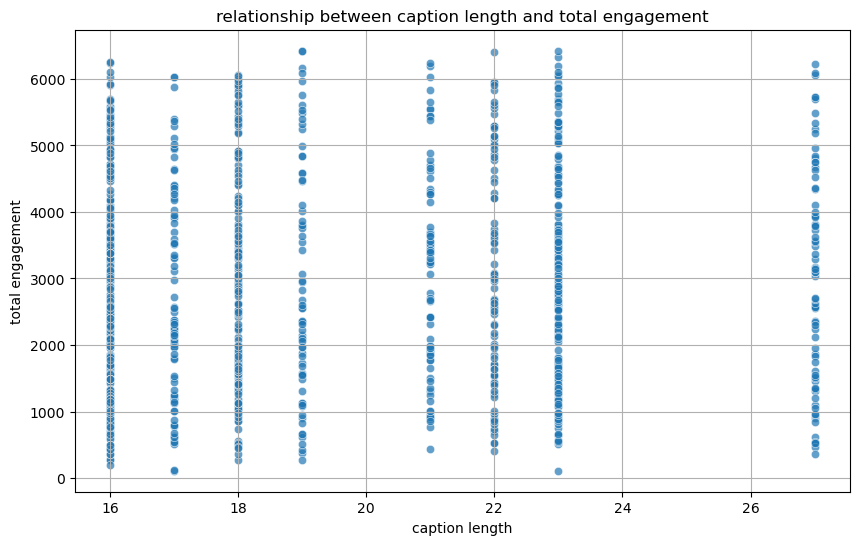

In [21]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
correlation=data3["caption_length"].corr(data3["total_engagement"])
print("correlation between caption length and engagement:",correlation)
plt.figure(figsize=(10,6))
sns.scatterplot(data=data3,x="caption_length",y="total_engagement",alpha=0.7)
plt.title("relationship between caption length and total engagement")
plt.xlabel("caption length")
plt.ylabel("total engagement")
plt.grid(True)
plt.show()

10. does using more hashtags lead to higher engagement

correlation between number of hashtags and total engagement: 0.049212862006696535


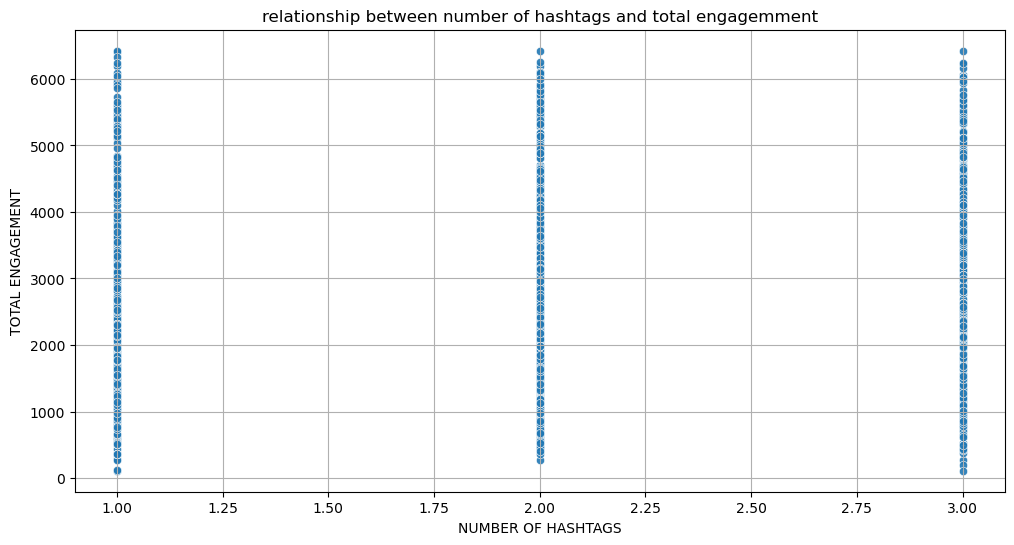

In [22]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
correlation2=data3["num_hashtags"].corr(data3["total_engagement"])
print("correlation between number of hashtags and total engagement:",correlation2)
plt.figure(figsize=(12,6))
sns.scatterplot(data=data3,x="num_hashtags",y="total_engagement",alpha=0.9)
plt.title("relationship between number of hashtags and total engagemment")
plt.xlabel("NUMBER OF HASHTAGS")
plt.ylabel("TOTAL ENGAGEMENT")
plt.grid(True)
plt.show()

11.how does the engagement differ between platforms for a specific post type

C:\Users\jonsn\AppData\Local\Temp\ipykernel_34256\792546187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filltered_data["total_engagement"]=filltered_data["likes"]+filltered_data["comments"]+filltered_data["shares"]


avarage engagement by posts from platform:
    platform  total_engagement
0   Facebook       4155.641791
1  Instagram       4152.966667
2    Twitter       2327.928571


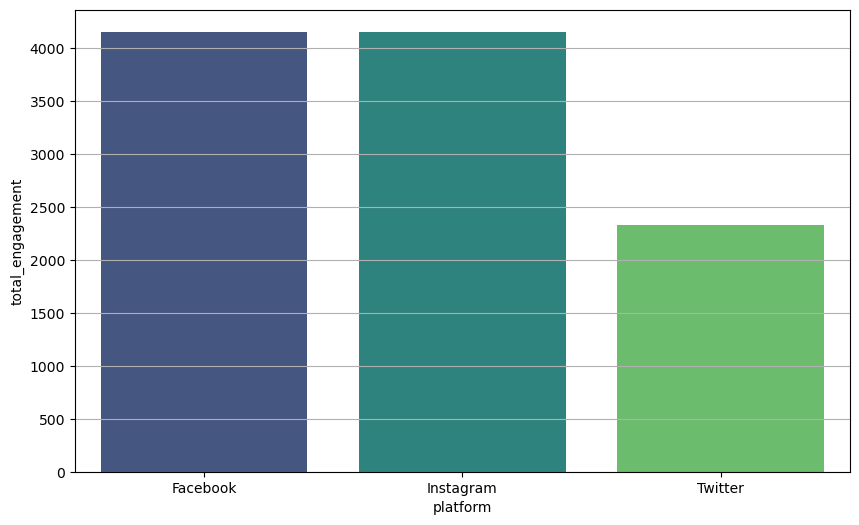

In [23]:
post_type="video"
filltered_data=data3[data3["post_type"].str.lower()==post_type.lower()]
filltered_data["total_engagement"]=filltered_data["likes"]+filltered_data["comments"]+filltered_data["shares"]
engagement_by_platform=filltered_data.groupby("platform")["total_engagement"].mean().reset_index()
print("avarage engagement by posts from platform:")
print(engagement_by_platform)
plt.figure(figsize=(10,6))
sns.barplot(data=engagement_by_platform,x="platform",y="total_engagement",palette="viridis")
plt.xlabel("platform")
plt.ylabel("total_engagement")
plt.grid(axis="y")
plt.show()

12.is there is a correlation between the sentiment of the caption and the level of engagement a post recives

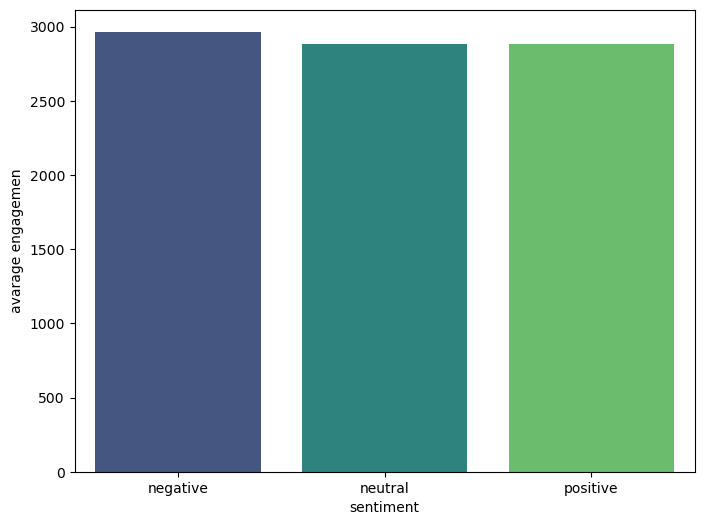

                 count         mean          std    min     25%     50%  \
sentiment_score                                                           
negative         321.0  2965.797508  1642.354284  265.0  1625.0  2707.0   
neutral          336.0  2883.205357  1591.082341  111.0  1549.5  2623.5   
positive         343.0  2881.428571  1601.357500  110.0  1501.0  2693.0   

                     75%     max  
sentiment_score                   
negative         4198.00  6423.0  
neutral          4206.25  6419.0  
positive         4047.50  6259.0  


In [24]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
sentiment_engagement=data3.groupby("sentiment_score")["total_engagement"].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=sentiment_engagement,x="sentiment_score",y="total_engagement",palette="viridis")
plt.xlabel("sentiment")
plt.ylabel("avarage engagemen")
plt.show()

print(data3.groupby("sentiment_score")["total_engagement"].describe())

13. is there is a correlation between hour of posting and engagement level


C:\Users\jonsn\AppData\Local\Temp\ipykernel_34256\308336223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation3=data3[["post_hour","total_engagement"]].corr()


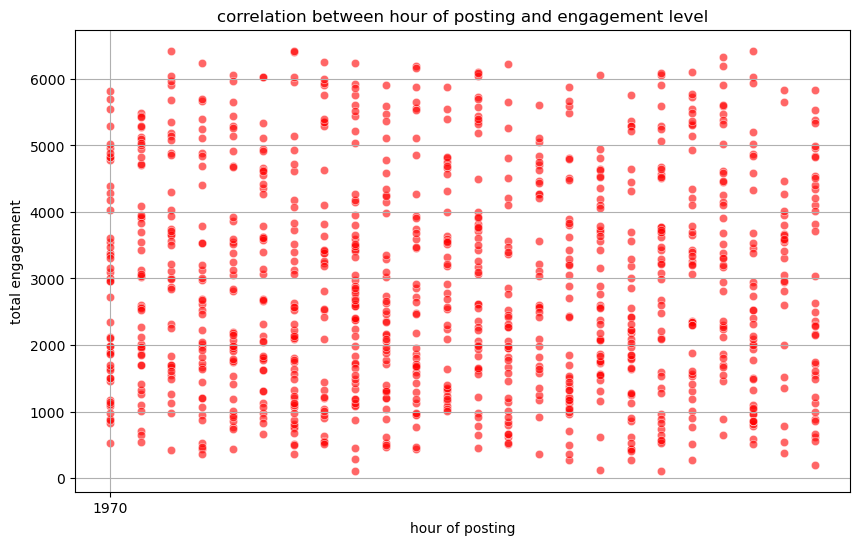

In [27]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
correlation3=data3[["post_hour","total_engagement"]].corr()
plt.figure(figsize=(10,6))
sns.scatterplot(data=data3,x="post_hour",y="total_engagement",alpha=0.6,color="red")
plt.title("correlation between hour of posting and engagement level")
plt.xlabel("hour of posting")
plt.ylabel("total engagement")
plt.grid(True)
plt.show()

14. what is the most common sentiment score for posts with high engagement

In [29]:
data3["total_engagement"]=data3["likes"]+data3["comments"]+data3["shares"]
high_engaged_posts=data3[data3["total_engagement"]>3000]
most_common_sentiment=high_engaged_posts["sentiment_score"].value_counts().idxmax()
most_common_sentiment_count=high_engaged_posts["sentiment_score"].value_counts().max()
print(most_common_sentiment)
print(most_common_sentiment_count)


positive
160


15.which post type is most effective on facebook platform

In [32]:
facebook_data=data3[data3["platform"]=="facebook"]
facebook_post_analysis=facebook_data.groupby("post_type")[["likes","comments","shares"]].mean()
facebook_post_analysis=facebook_post_analysis.sort_values(by="likes",ascending=False)
print(facebook_post_analysis)

Empty DataFrame
Columns: [likes, comments, shares]
Index: []


SUMMARY:


The dataset consists of 1,000 social media posts spanning multiple platforms, including Facebook, Instagram, and Twitter. It includes 14 attributes that capture various aspects of these posts, such as their post type (e.g., image, video, poll, carousel, text), caption content, and associated hashtags. Engagement metrics like likes, comments, and shares are recorded for each post, providing insight into audience interaction. The dataset also includes metadata such as caption length, number of hashtags, and the time and day of posting, which can help analyze posting trends. Additionally, each caption is labeled with a sentiment score (positive, neutral, negative), allowing for sentiment analysis.

The dataset is well-structured, with no missing values across any of the columns. This allows for detailed exploration, such as identifying the most effective post types, optimal posting times, or how sentiment and hashtags influence engagement. It provides a rich foundation for understanding content performance across different social media platforms.


CONCLUSION:

 this dataset provides a comprehensive overview of social media engagement across various platforms, offering valuable insights into the relationship between post attributes and audience interaction. By analyzing factors such as post type, caption characteristics, hashtags, and sentiment, it is possible to identify trends and strategies for maximizing engagement. The inclusion of time- and platform-specific data further enables a nuanced understanding of optimal posting practices. This dataset serves as a powerful resource for developing data-driven content strategies and enhancing social media performance.